# Fisheye to Plane

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage.color import rgb2gray
from PIL import Image

Check

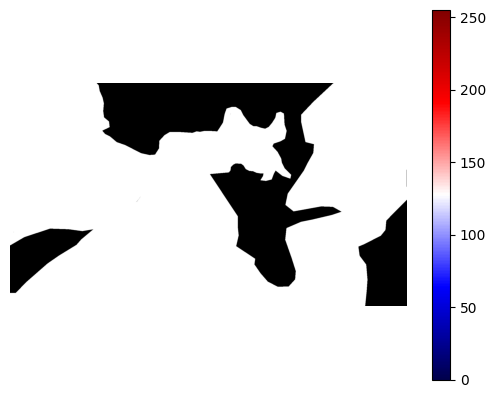

In [4]:
# Define the path to the image
img_path = '/home/tim/Documents/04_Projekt_ConSim/camera_contamination/data/git_japaner/test_gt/soiling3_15.png'




# Load the image
image = Image.open(img_path)

# Convert the image to a numpy array
image_array = np.array(image)

# Plot the image
plt.imshow(image_array, cmap='seismic')
plt.axis('off')  # Turn off axis numbers and ticks
plt.colorbar()
plt.show()


### 3. Blurr

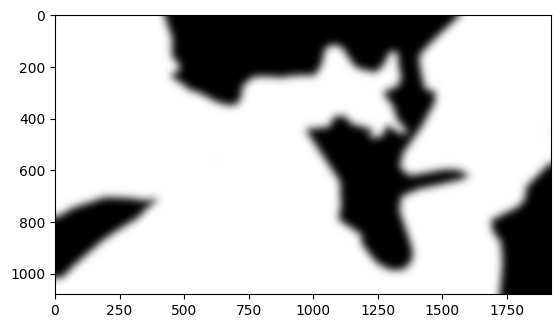

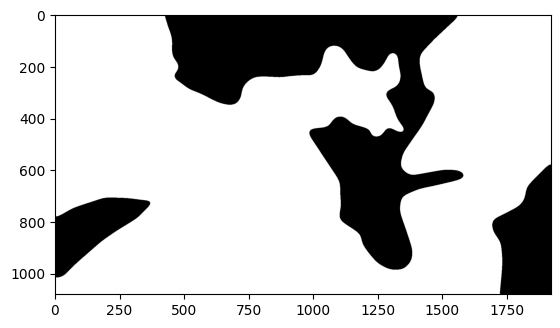

In [5]:



# Load the image
image = Image.open(img_path)

# Convert the image to a numpy array
image_array = np.array(image)

# Gaussian Blur anwenden
smoothed_img = cv2.GaussianBlur(image_array, (101, 101), 0)


plt.imshow(smoothed_img)
plt.show()

# Schwellenwert anwenden, um binäre Werte zu erhalten
_, finish_img = cv2.threshold(smoothed_img, 127, 255, cv2.THRESH_BINARY)


plt.imshow(finish_img)
plt.show()

In [6]:

import os
import cv2
import numpy as np
from PIL import Image

def process_images_in_directory(directory_path, kernel_size=(101, 101), threshold_value=127):
    """
    This function applies Gaussian blur and thresholding to all images in the given directory.
    It will replace the original images with the processed images.
    
    Args:
    - directory_path (str): Path to the directory containing the images.
    - kernel_size (tuple): Kernel size for Gaussian blur (should be odd values, e.g., (101, 101)).
    - threshold_value (int): Threshold value for binarization (default is 127).
    
    Returns:
    None: The function will process and replace the images in the given directory.
    """
    
    # Loop through all files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
            # Construct the full path to the image file
            img_path = os.path.join(directory_path, filename)

            # Load the image
            image = Image.open(img_path)
            
            # Convert the image to a numpy array
            image_array = np.array(image)
            

            # Apply Gaussian Blur
            smoothed_img = cv2.GaussianBlur(image_array, kernel_size, 0)

            # Apply threshold to get binary image
            _, finish_img = cv2.threshold(smoothed_img, threshold_value, 255, cv2.THRESH_BINARY)

            # Convert the resulting numpy array back to an image
            finish_image = Image.fromarray(finish_img)

            # Save the processed image, replacing the original
            finish_image.save(img_path)

    print(f"Processing complete! All images in {directory_path} have been processed and replaced.")




# Test
process_images_in_directory("/home/tim/Documents/04_Projekt_ConSim/camera_contamination/data/git_japaner/test_gt")



Processing complete! All images in /home/tim/Documents/04_Projekt_ConSim/camera_contamination/data/git_japaner/test_gt have been processed and replaced.
